# Data Visualization

Goal
- explore the multidimensional nature of data set

Basic plots
- bar chart
- line graphs
- scatter plots

Distribution plots
- boxplots
- histogram

In [1]:
import calendar
import os

import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import parallel_coordinates, scatter_matrix
from sklearn import preprocessing

In [2]:
from dmba import load_boston_housing, load_data

## Basic Plots

### Amtrak Visualization

Text(0, 0.5, 'Ridership (in 000s)')

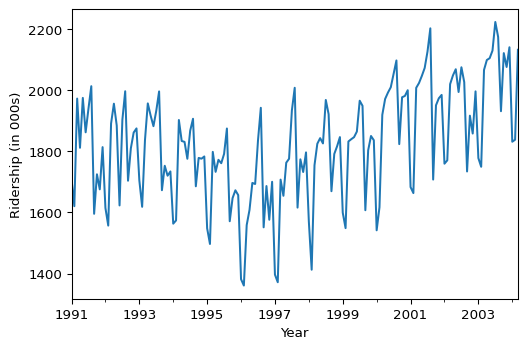

In [3]:
df = load_data("Amtrak.csv")
df["date"] = pd.to_datetime(df.month, format="%d/%m/%Y")
ridership_ts = pd.Series(df.ridership.values, index=df.date)
ax = ridership_ts.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Ridership (in 000s)")

### Boston Housing visualization

Text(0.5, 1.0, 'LSTAT vs. MEDV')

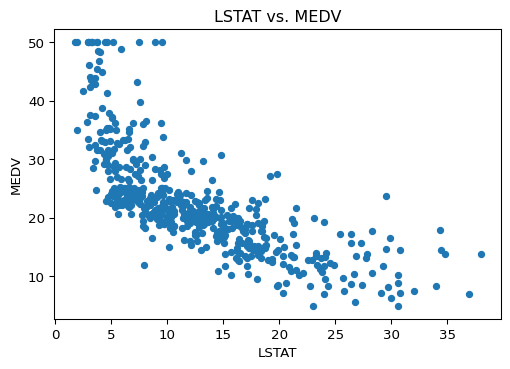

In [4]:
df = load_boston_housing()
ax = df.plot.scatter(x="lstat", y="medv")
ax.set_xlabel("LSTAT")
ax.set_ylabel("MEDV")
ax.set_title("LSTAT vs. MEDV")

Text(0.5, 1.0, 'CHAS vs. Avg. MEDV')

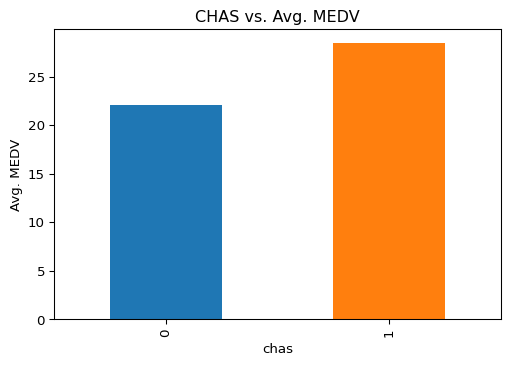

In [5]:
ax = df.groupby("chas").mean().medv.plot.bar(color=["C0", "C1"])
ax.set_ylabel("Avg. MEDV")
ax.set_title("CHAS vs. Avg. MEDV")

Text(0, 0.5, '% of CAT. MEDV')

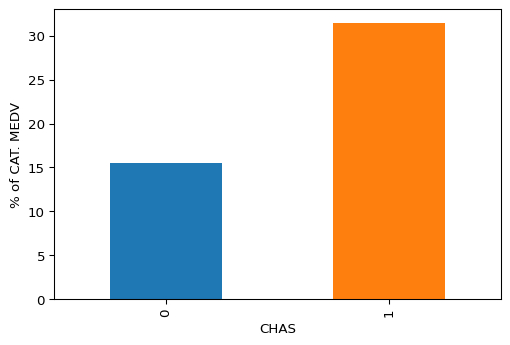

In [6]:
ax = (df.groupby("chas").mean().cat_medv * 100).plot.bar(color=["C0", "C1"])
ax.set_xlabel("CHAS")
ax.set_ylabel("% of CAT. MEDV")

## Distribution Plots: Boxplots and Histograms

Text(0, 0.5, 'count')

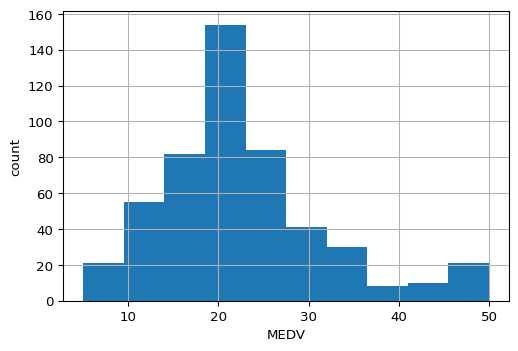

In [7]:
df = load_boston_housing()
ax = df.medv.hist()
ax.set_xlabel("MEDV")
ax.set_ylabel("count")

Text(0, 0.5, 'MEDV')

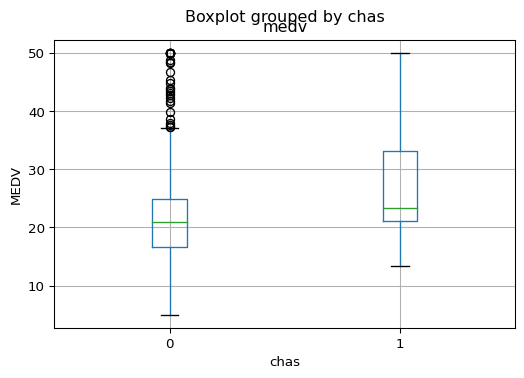

In [8]:
ax = df.boxplot(column="medv", by="chas")
ax.set_ylabel("MEDV")